# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.087816e+01     9.224920e+00
 * time: 0.0021729469299316406
     1     2.826185e+01     5.486514e+00
 * time: 0.007982969284057617
     2     2.094444e+01     5.020299e+00
 * time: 0.014747858047485352
     3     1.398224e+01     3.612507e+00
 * time: 0.019685983657836914
     4     1.110388e+01     1.554382e+00
 * time: 0.02427983283996582
     5     1.035470e+01     2.608658e+00
 * time: 0.027856826782226562
     6     9.871901e+00     1.726646e+00
 * time: 0.031726837158203125
     7     9.281256e+00     1.348261e+00
 * time: 0.03531694412231445
     8     8.720086e+00     1.092967e+00
 * time: 0.03889894485473633
     9     8.406743e+00     7.805019e-01
 * time: 0.04285883903503418
    10     8.292139e+00     8.281701e-01
 * time: 0.046823978424072266
    11     8.181108e+00     7.166399e-01
 * time: 0.10384893417358398
    12     8.143120e+00     9.126291e-01
 * time: 0.10671687126159668
    13     8.072580e+00     6.379500e-01


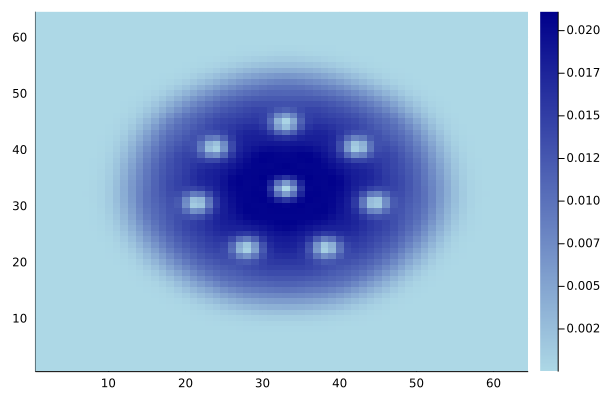

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)